<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Sebastián Campos;201773517-1;Nueva</h3>
    <h3 align="center">Axel Reyes;201773502-3;Nueva</h3>
    <h3 align="center">Abril 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 3 de Mayo.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**


---
**Esto es solo una sugerencia y no tendrá ningún impacto en su nota**

## Tip para Gráficos (Python)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria seaborn

```python
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline #con esto no es necesario hacer plt.show()
```

El uso es igual que un gráfico de matplotlib, solo que ```sns.set()``` hace que se cargue la visualización de seaborn encima. [Informacion sobre seaborn.set()](https://seaborn.pydata.org/generated/seaborn.set.html)

## Tip para Gráficos (R)

Puede hacer sus gráficos un poco más estilosos utilizando la libreria [ggplot2](https://www.statmethods.net/advgraphs/ggplot2.html)


## Interactive Widgets

Si usted está trabajando en python puede hacer una widget interactiva que varíe los parámetros de una función, como se puede ver en el siguiente fragmento de código (debe ejecutarlo).

In [14]:
from ipywidgets import interact 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline 

def plot_serie(x):
    values = np.arange(1,x,0.5)**2
    values2 = np.arange(1,x,0.5)**3
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(values/values2)
        

interact(plot_serie,x=(2,20))

A Jupyter Widget

<function __main__.plot_serie>

---
## 1. Retención de Clientes

La fuga (*churn*, término en inglés) de clientes es algo que muchas empresas de hoy en día sufren, la fuga puede deberse a muchos factores, uno de estos podría ser alguna característica del servicio en sí que provee la empresa. En esta sección usted trabajará con un dataset de "Telco", una empresa de telecomunicaciones, donde verá varios datos relacionados al plan de los clientes, uno de estos campos siendo "*Churn*", si el cliente se fugó o no. 

El archivo a utilizar es "churn.csv" y para información extra puede referirse a [este enlace](https://www.kaggle.com/blastchar/telco-customer-churn)

>a) Haga un análisis exploratorio **a su criterio** del dataset y extraiga 3 conclusiones acerca del conjunto de datos

No handles with labels found to put in legend.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A070275EB8>,
      dtype=object)

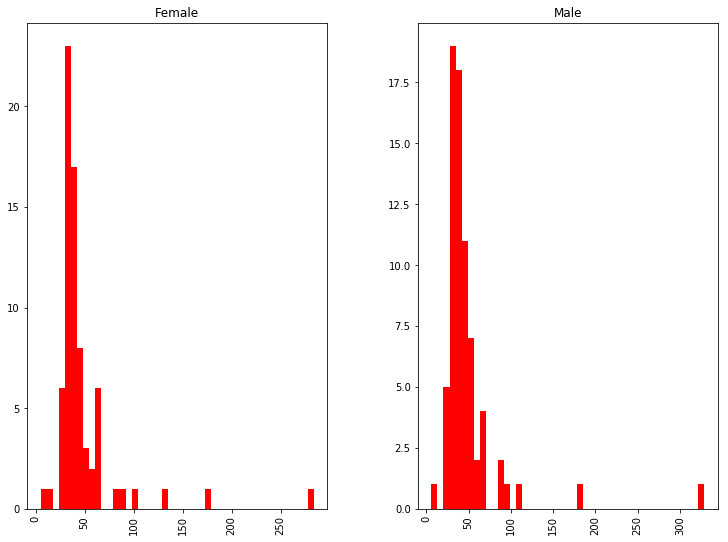

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#Se extraen los datos de churn.csv
info=pd.read_csv('churn.csv',sep=',',header=0,index_col =0)
#Se realiza una agrupación de tenure y genero
hist=info.groupby(['tenure','gender']).size()
#Se realizan los histograma de Tenure siendo mujer y tenure siendo hombre
fig=plt.figure(figsize=(12,9))
ax=fig.gca()
plt.xticks(fontsize=14)  
plt.yticks(range(5000, 30001, 5000), fontsize=14)
plt.xlabel("Elo Rating", fontsize=16)  
plt.ylabel("Count", fontsize=16) 
plt.legend()
hist.hist(by='gender',bins=45,ax=ax,color=['r'])


 El eje X representa el Tenure y el Eje Y representa el rango de la cantidad de personas que lo poseen.
 Al realizar dos histogramas los cuales representan la población de hombres y mujeres con respecto a su estadía. Se puede notar claramente una distribución bastante similar entre los dos histogramas, con la diferencia de que la escala de los hombres es un poco menor con respecto a las mujeres, mostrando un máximo de aproximadamente 18 para hombres rodeando entre cero y cincuenta meses, en cambio las mujeres muestran aproximadamente 25 como máximo. Finalmente, se concluye que tanto los hombres como las mujeres tienden a mantenerse, en promedio, la misma cantidad de meses en la empresa.
 

No handles with labels found to put in legend.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A06D5FECF8>,
      dtype=object)

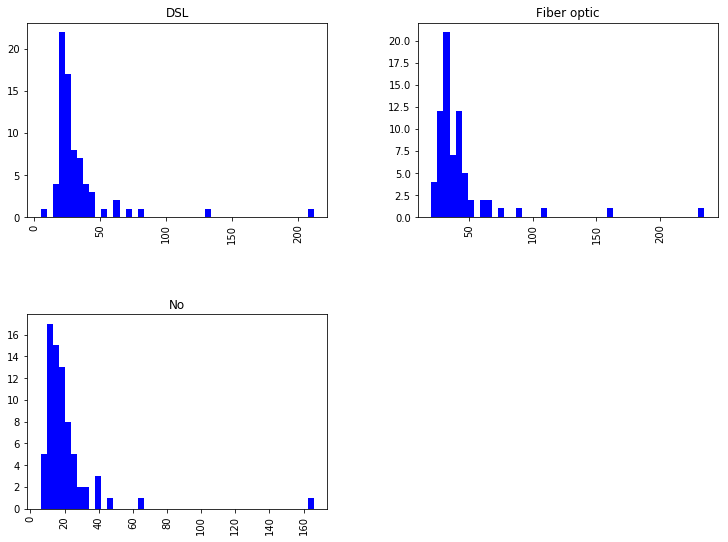

In [4]:
hist=info.groupby(['tenure','InternetService']).size()
#Se realizan los histograma de Tenure respecto a los distintos servicios de internet.
fig=plt.figure(figsize=(12,9))
ax=fig.gca()
plt.xticks(fontsize=14)  
plt.yticks(range(5000, 30001, 5000), fontsize=14)
plt.xlabel("XD", fontsize=16)  
plt.ylabel("Count", fontsize=16) 
plt.legend()
hist.hist(by='InternetService',bins=45,ax=ax,color=['b'])


El eje X representa el Tenure y el Eje Y representa el rango de la cantidad de personas que lo poseen.
Como se puede ver en los gráficos, los cliente con fibra óptica tienden un poco más a mantenerse dentro de la empresa respecto a los que no contraran internet y los que contratan DSL. De todas formas, para todos los casos no se muestra una diferencia significativa respecto a las personas que contratan servicios de internet con la compañía con los que no contratan ningún tipo de internet, mostrando un comportamiento similar en relación a su fidelidad con la empresa.

> b.1) Determine la probabilidad de que: <ul>
    <li>Un cliente sea mujer dado que tiene fibra óptica </li>
    <li>Un cliente sea hombre dado que tiene fibra óptica</li>
    <li>Un cliente sea mujer dado que no tiene fibra óptica</li>
    <li>Un cliente sea hombre dado que no tiene fibra óptica</li>
    </ul>
    Además indique cuál/es de estos pares deben sumar 1 (Si es que algún par debe sumar esta cantidad). Justifique su respuesta.
    

In [3]:
import pandas as pd
info = pd.read_csv("churn.csv",header = 0)

# Se crea la tabla de genero y servicio de internet y se muestra por pantalla.
gender_and_internet = info.groupby(['gender','InternetService']).size()
print(gender_and_internet,'\n')

# Se crea la tabla de gener y se muestra por pantalla
gender = info.groupby(['gender']).size()
print(gender,'\n')

#Se guarda la cantidad de hombres y mujeres

hombre = gender[1]                                   
mujer = gender[0]
total = hombre + mujer
fibra = gender_and_internet[1]+gender_and_internet[4]

# Se calcula la probabilidad de ser hombre, mujer, y tener fibra respectivamente.
prob_hombre = hombre/total
prob_mujer = mujer/total
prob_fibra = fibra/total

"""
Se guarda la cantidad de mujeres que poseen fibra para calcular la probabilidad de ser mujer y tener
fibra a la vez. Finalmente se calcula la probabilidad de ser mujer dado que el cliente tiene fibra.
"""
mujer_y_fibra = gender_and_internet[1]
mujer_inter_fibra = mujer_y_fibra/total
mujer_dado_fibra = mujer_inter_fibra/prob_fibra
print("La probabilidad de que un cliente sea mujer dado que tiene fibra optica es:",mujer_dado_fibra)

"""
Se guarda la cantidad de hombres que poseen fibra para calcular la probabilidad de ser hombre y tener
fibra a la vez. Finalmente se calcula la probabilidad de ser hombre dado que el cliente tiene fibra.
"""
hombre_y_fibra = gender_and_internet[4]
hombre_inter_fibra = hombre_y_fibra/total
hombre_dado_fibra = hombre_inter_fibra/prob_fibra
print("La probabilidad de que un cliente sea hombre dado que tiene fibra optica es:",hombre_dado_fibra)

"""
Se guarda la cantidad de mujeres que no poseen fibra para calcular la probabilidad de ser mujer y no tener
fibra a la vez. Finalmente se calcula la probabilidad de ser mujer dado que el cliente no tiene fibra.
"""
mujer_y_nofibra = gender_and_internet[0]+gender_and_internet[2]
mujer_inter_nofibra = mujer_y_nofibra/total
mujer_dado_nofibra = mujer_inter_nofibra/(1-prob_fibra)
print("La probabilidad de que un cliente sea mujer dado que no tiene fibra optica es:",mujer_dado_nofibra)

"""
Se guarda la cantidad de hombres que no poseen fibra para calcular la probabilidad de ser hombre y no tener
fibra a la vez. Finalmente se calcula la probabilidad de ser hombre dado que el cliente no tiene fibra.
"""
hombre_y_nofibra = gender_and_internet[3]+gender_and_internet[5]
hombre_inter_nofibra = hombre_y_nofibra/total
hombre_dado_nofibra = hombre_inter_nofibra/(1-prob_fibra)
print("La probabilidad de que un cliente sea hombre dado que no tiene fibra optica es:",hombre_dado_nofibra)


gender  InternetService
Female  DSL                1188
        Fiber optic        1553
        No                  747
Male    DSL                1233
        Fiber optic        1543
        No                  779
dtype: int64 

gender
Female    3488
Male      3555
dtype: int64 

La probabilidad de que un cliente sea mujer dado que tiene fibra optica es: 0.5016149870801033
La probabilidad de que un cliente sea hombre dado que tiene fibra optica es: 0.4983850129198967
La probabilidad de que un cliente sea mujer dado que no tiene fibra optica es: 0.49024575627058525
La probabilidad de que un cliente sea hombre dado que no tiene fibra optica es: 0.5097542437294148


La primera con la segunda probabilidad deben sumar 1, al igual que la tercera con la cuarta. Esto porque P(A|B) = 1-P(~A|B). En el primer caso el evento A correspondría a "ser mujer" y B "tener fibra optica"
En el segundo caso El evento A también sería "ser mujer", pero el evento B sería "no tener fibra óptica". En ambos casos el evento B se mantiene intacto, mientras que la negación sólo va en el evento A, cumpliéndose que P(A|B) = 1-P(~A|B)

>b.2) ¿Es posible concluir que si un cliente es hombre tiene más probabilidad de tener fibra óptica? ¿Y si es mujer? ¿Por qué?

A priori no , ya que P(A|B) no necesariamente es igual que P(B|A), que es lo que propone la pregunta. Pero se puede calcular por teorema de Bayes como P(B|A) = (P(A|B)*P(B))/P(A)

In [4]:
fibra_dado_hombre = (hombre_dado_fibra*prob_fibra)/prob_hombre
fibra_dado_mujer = (mujer_dado_fibra*prob_fibra)/prob_mujer
print("La probabilidad de que un cliente tenga fibra optica dado que es hombre es de:",fibra_dado_hombre)
print("La probabilidad de que un cliente tenga fibra optica dado que es mujer es de:",fibra_dado_mujer)

La probabilidad de que un cliente tenga fibra optica dado que es hombre es de: 0.4340365682137834
La probabilidad de que un cliente tenga fibra optica dado que es mujer es de: 0.4452408256880734


Dado que ambos resultados no superan el 50% de probabilidad independiente de si el cliente es hombre o mujer, es menos probable de que tenga fibra optica en lugar de otros servicios de internet o no tener. 

>c) Utilizando criterios de probabilidad condicional ¿Hay algún servicio de internet más propenso a la fuga?

In [5]:
# Se crea la tabla que representa la cantidad de clientes que se van y los servicios de internet, y se printea.
fuga_and_internet = info.groupby(['Churn','InternetService']).size()
print(fuga_and_internet)

"""
Se calcula la probabilidad de tener DSL, luego se calcula la probabilidad de tener DSL e irse, y 
finalmente se calcula la probabilidad de que el cliente se vaya dado que tiene DSL.
"""
prob_DSL = (fuga_and_internet[0]+fuga_and_internet[3])/total 
DSL_inter_fuga = fuga_and_internet[3]/total
fuga_dado_DSL = DSL_inter_fuga/prob_DSL
print("\nLa probabilidad de que un cliente se vaya dado que tiene DSL es de:", fuga_dado_DSL)

"""
Se calcula la probabilidad de tener fibra e irse, y 
con la probabilidad de tener fibra que ya se habia calculado, se calcula la probabilidad de que el cliente 
se vaya dado que tiene fibra.
"""
fibra_inter_fuga = fuga_and_internet[4]/total
fuga_dado_fibra = fibra_inter_fuga/prob_fibra
print("La probabilidad de que un cliente se vaya dado que tiene fibra optica es de:", fuga_dado_fibra)

"""
Se calcula la probabilidad de no tener servicios de internet, luego se calcula la probabilidad de no tener 
servicios de internet e irse, y finalmente se calcula la probabilidad de que el cliente se vaya dado que no
tiene servicios de internet8.
"""
prob_no = (fuga_and_internet[2]+fuga_and_internet[5])/total
no_inter_fuga = fuga_and_internet[5]/total
fuga_dado_no = no_inter_fuga/prob_no
print("La probabilidad de que un cliente se vaya dado que no tiene servicios de internet es de:", fuga_dado_no)

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    DSL                 459
       Fiber optic        1297
       No                  113
dtype: int64

La probabilidad de que un cliente se vaya dado que tiene DSL es de: 0.18959107806691447
La probabilidad de que un cliente se vaya dado que tiene fibra optica es de: 0.4189276485788114
La probabilidad de que un cliente se vaya dado que no tiene servicios de internet es de: 0.07404980340760157


Observando las probabilidades condicionales calculadas, se puede concluir de que el servicio de fibra optica es más propenso a la fuga que el de DSL. 
Además, se puede ver que aquellos clientes sin servicio de internet son mucho menos propensos a la fuga.

>d) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la fuga? y ¿es la fuga un buen predictor del cargo mensual de un cliente?

In [6]:
#Se obtienen la cantidad de clientes que cumplen ambas condiciones segun cada caso
# bajo: costo mensual bajo la mediana
# sobre: costo mensual sobre la mediana
# yes: se fue
# no: no se fue
bajo_and_yes = len(info[(info.MonthlyCharges < 70.35) & (info.Churn == 'Yes')])
bajo_and_no =  len(info[(info.MonthlyCharges < 70.35) & (info.Churn == 'No')])
sobre_and_yes =  len(info[(info.MonthlyCharges >= 70.35) & (info.Churn == 'Yes')])
sobre_and_no =  len(info[(info.MonthlyCharges >= 70.35) & (info.Churn == 'No')])
total = bajo_and_yes + bajo_and_no + sobre_and_no + sobre_and_yes

#Se calculan las probabilidades respectivamente con la definicion de probabilidad condicional
fuga_dado_bajo = (bajo_and_yes/total)/((bajo_and_yes+bajo_and_no)/total) 
fuga_dado_sobre = (sobre_and_yes/total)/((sobre_and_yes+sobre_and_no)/total)
nofuga_dado_bajo = 1-fuga_dado_bajo
nofuga_dado_sobre = 1-fuga_dado_sobre

print("La probabilidad de que el cliente se vaya dado que su cargo mensual es bajo la mediana es de:", fuga_dado_bajo)
print("La probabilidad de que el cliente se vaya dado que su cargo mensual es sobre la mediana es de:", fuga_dado_sobre)
print("La probabilidad de que el cliente no se vaya dado que su cargo mensual es bajo la mediana es de:", nofuga_dado_bajo)
print("La probabilidad de que el cliente no se vaya dado que su cargo mensual es sobre la mediana es de:", nofuga_dado_sobre)

#Se calculan las probabilidades respectivamente con la definicion de probabilidad condicional
bajo_dado_fuga = (bajo_and_yes/total)/((bajo_and_yes+sobre_and_yes)/total) 
bajo_dado_nofuga = (sobre_and_yes/total)/((bajo_and_no+sobre_and_no)/total)
sobre_dado_fuga = 1-bajo_dado_fuga
sobre_dado_nofuga = 1-bajo_dado_nofuga

print("La probabilidad de que su cargo mensual sea bajo la mediana dado que se fue es de:", bajo_dado_fuga)
print("La probabilidad de que su cargo mensual sea bajo la mediana dado que no se fue es de:", bajo_dado_nofuga)
print("La probabilidad de que su cargo mensual sea sobre la mediana dado que se fue es de:", sobre_dado_fuga)
print("La probabilidad de que su cargo mensual sea sobre la mediana dado que no se fue es de:", sobre_dado_nofuga)

La probabilidad de que el cliente se vaya dado que su cargo mensual es bajo la mediana es de: 0.1793123046319977
La probabilidad de que el cliente se vaya dado que su cargo mensual es sobre la mediana es de: 0.35130533484676507
La probabilidad de que el cliente no se vaya dado que su cargo mensual es bajo la mediana es de: 0.8206876953680022
La probabilidad de que el cliente no se vaya dado que su cargo mensual es sobre la mediana es de: 0.6486946651532349
La probabilidad de que su cargo mensual sea bajo la mediana dado que se fue es de: 0.33761369716425893
La probabilidad de que su cargo mensual sea bajo la mediana dado que no se fue es de: 0.23927328952454582
La probabilidad de que su cargo mensual sea sobre la mediana dado que se fue es de: 0.6623863028357411
La probabilidad de que su cargo mensual sea sobre la mediana dado que no se fue es de: 0.7607267104754541


Dado que las probabilidades son bastante lejanas del 0.5 en ambos casos, se puede concluir de que ambos son buenos predictores.

>e) Utilizando criterios de probabilidad condicional, ¿es el cargo mensual un buen predictor de la estadia de un cliente? y ¿es la estadia del cliente un buen predictor del cargo mensual de este?

*Estadia*: tenure

In [8]:
#Se obtienen la cantidad de clientes que cumplen ambas condiciones segun cada caso
# bE: estadia bajo la mediana
# sE: estadia sobre la mediana
# bM: costo mensual bajo la mediana
# sM: costo mensual sobre la mediana
bE_and_bM = len(info[(info.MonthlyCharges < 70.35) & (info.tenure < 29)])
bE_and_sM = len(info[(info.MonthlyCharges < 70.35) & (info.tenure >= 29)])
sE_and_bM = len(info[(info.MonthlyCharges >= 70.35) & (info.tenure < 29)])
sE_and_sM = len(info[(info.MonthlyCharges >= 70.35) & (info.tenure >= 29)])

#Se calculan las probabilidades respectivamente con la definicion de probabilidad condicional
bE_dado_bM = (bE_and_bM/total)/((bE_and_bM+sE_and_bM)/total)
bE_dado_sM = (bE_and_bM/total)/((bE_and_sM+sE_and_sM)/total)
sE_dado_bM = 1-bE_dado_bM
sE_dado_sM = 1-bE_dado_sM

print("La probabilidad de que el cliente tenga una estadia bajo la mediana dado que su cargo mensual esta bajo la mediana es de :", bE_dado_bM)
print("\nLa probabilidad de que el cliente tenga una estadia bajo la mediana dado que su cargo mensual esta sobre la mediana es de :", bE_dado_sM)
print("\nLa probabilidad de que el cliente tenga una estadia sobre la mediana dado que su cargo mensual esta bajo la mediana es de :", sE_dado_bM)
print("\nLa probabilidad de que el cliente tenga una estadia sobre la mediana dado que su cargo mensual esta sobre la mediana es de :", sE_dado_sM)

#Se calculan las probabilidades respectivamente con la definicion de probabilidad condicional
bM_dado_bE = (bE_and_bM/total)/((bE_and_bM+bE_and_sM)/total)
bM_dado_sE = (bE_and_bM/total)/((sE_and_bM+sE_and_sM)/total)
sM_dado_bE = 1-bM_dado_bE
sM_dado_sE = 1-bM_dado_sE

print("\n\n\nLa probabilidad de que el cliente tenga un cargo mensual bajo la mediana dado que su estadia esta bajo la mediana es de :", bM_dado_bE)
print("\nLa probabilidad de que el cliente tenga un cargo mensual bajo la mediana dado que su estadia esta sobre la mediana es de :", bM_dado_sE)
print("\nLa probabilidad de que el cliente tenga un cargo mensual sobre la mediana dado que su estadia esta bajo la mediana es de :", sM_dado_bE)
print("\nLa probabilidad de que el cliente tenga un cargo mensual sobre la mediana dado que su estadia esta sobre la mediana es de :", sM_dado_sE)



La probabilidad de que el cliente tenga una estadia bajo la mediana dado que su cargo mensual esta bajo la mediana es de : 0.5865027166142408

La probabilidad de que el cliente tenga una estadia bajo la mediana dado que su cargo mensual esta sobre la mediana es de : 0.5783981951494643

La probabilidad de que el cliente tenga una estadia sobre la mediana dado que su cargo mensual esta bajo la mediana es de : 0.4134972833857592

La probabilidad de que el cliente tenga una estadia sobre la mediana dado que su cargo mensual esta sobre la mediana es de : 0.42160180485053567



La probabilidad de que el cliente tenga un cargo mensual bajo la mediana dado que su estadia esta bajo la mediana es de : 0.5828360329639103

La probabilidad de que el cliente tenga un cargo mensual bajo la mediana dado que su estadia esta sobre la mediana es de : 0.5820090805902384

La probabilidad de que el cliente tenga un cargo mensual sobre la mediana dado que su estadia esta bajo la mediana es de : 0.41716396703

Dado que todas las probabilidades están cerca del 0.5, se puede concluir que ninguno de los dos son buenos predictores. 

## 2. Máquina de Rube Goldberg

Una máquina de Rube Goldberg es un artefacto extremadamente complejo que realiza una tarea fácil. Usted, en su tiempo libre, decidió construir uno de estos artefactos que consta de 5 etapas:

<ol>
    <li>Lanza una bolita que rueda por un riel con una probabilidad de $\dfrac{2}{5}$ de caerse</li>
    <li>Después de rodar por el riel cae en una catapulta que la lanza en la dirección correcta el $60\%$ de las veces</li>
    <li>Impacta contra una tela que le frena el impulso y la hace caer sobre el interruptor de un ventilador, el $80\%$ de las veces es capaz de activar el ventilador</li>
    <li>Cuando el ventilador se activa empuja un barco de juguete en una fuente con agua hasta el otro extremo de esta para empujar otra bolita, el barco llega con suficiente impulso con una probabilidad de $\dfrac{6}{9}$</li>
    <li>Esta bolita rueda por otro riel y cae sobre el control remoto que enciende su televisor, en un $30\%$ de las veces logra encenderlo</li>
</ol>

>a) Usted quiere subir su máquina de Rube Goldberg a Youtube™, estime cuántas veces (en promedio) tendrá que poner en marcha su máquina hasta que resulte por primera vez en video. A su vez, haga un gráfico mostrando la probabilidad de no tener éxito en función del número de puestas en marcha de la máquina y comente.

In [6]:
from random import randint, uniform,random
import matplotlib.pyplot as plt

probfallas=[0.4,0.4,0.2,0.3333333333,0.7]
fallas=[40,40,20,33,70]

i1=0
intentos=[]
#                                            Cantidad de veces promedio
#-------------------------------------------------------------------------------------------------------------------------
#Se procede a realizar 10000 lanzamientos de 100 bolitas, cada lanzamiento de cien bolitas se detiene en el punto en que una
#bolita logra el éxito, y por cada lanzamiento se cuentan cuantos intentos son necesarios para lograr el éxito.
while(i1<10000): #10000 lanzamientos
    
    i=1
    while(i<100):#100 bolitas
        if(randint(0,100)<=40):
            i+=1
        else:
            if(randint(0,100)<=40):
                i+=1
            else:
                if(randint(0,100)<=20):
                    i+=1
                else:
                    if(randint(0,100)<=33):
                        i+=1
                    else:
                        if(randint(0,100)<=70):
                            i+=1
                        else:
                            intentos.append(i)
                            break
    i1+=1
sumalista=0
#Se realiza el promedio entre todos los elementos y la cantidad de lanzamientos de cien bolitas.
for elemento in intentos:
    sumalista+=elemento
print(sumalista/10000)

#--------------------------------------------------------------------------------------------------------------------------




17.4171


No handles with labels found to put in legend.


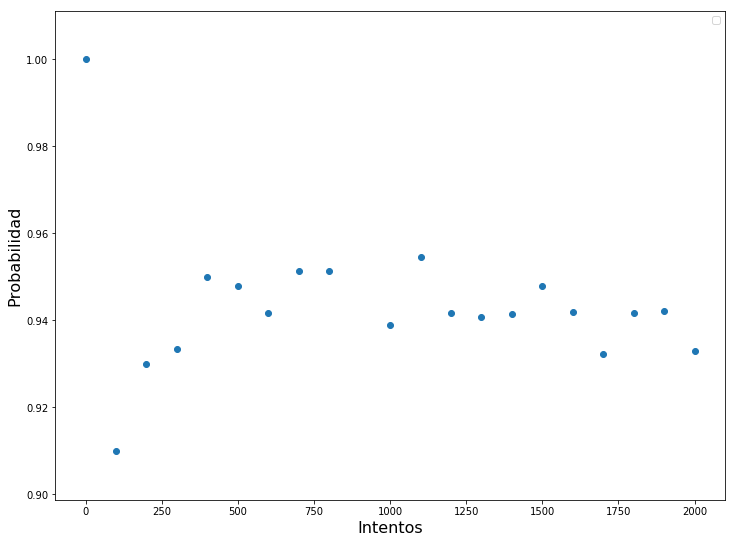

In [11]:
casos=[1,100,200,300,400,500,600,700,800,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000]
exitos=[]
#Se realiza una lista, cada elemento de la lista significa una cantidad de bolitas las cuales seran lanzadas en el while.
#Se guarda cada éxito de cada ronda de lanzamientos y se calcula la probabilidad de fallo.
for i in casos:
    i1=0
    cont=0
    while(i1<i):
        if(randint(0,100)<=40):
            i1+=1
        else:
            if(randint(0,100)<=40):
                i1+=1
            else:
                if(randint(0,100)<=20):
                    i1+=1
                else:
                    if(randint(0,100)<=33):
                        i1+=1
                    else:
                        if(randint(0,100)<=70):
                            i1+=1
                        else:
                            cont+=1
    exitos.append(cont)
i=0
pf=[]
#Finalmente se procede a realizar un gráfico de dispersión que representa la cantidad de bolitas tiradas v/s su probabilidad
#de fallo
while(i<20):
    pf.append(1-(exitos[i]/casos[i]))
    i+=1
plt.figure(figsize=(12,9))
plt.xlabel("Intentos", fontsize=16)  
plt.ylabel("Probabilidad", fontsize=16) 
plt.legend()
plt.scatter(casos, pf)
plt.show()
    



En promedio, se necesitaran de por lo menos entre 17 y 18 pruebas para que se pueda lograr grabar el proceso completo de una máquina de Rude Goldberg.
Por otro lado, el gráfico de dispersión nos señala que las probabilidades pueden fluctuar bastante al comienzo (entre 1 y 400 intentos), para luego comenzar a concentrarse entre 0.93 y 0.95. Éste comportamiento se puede empezar a notar después de los 1000 intentos, y se identifica una tendencia a las probabilidades a acercarse a 0.94.

> b) Si usted cuenta con 1000 bolitas, estime tanto téorica como empíricamente cuántas bolitas fallan en cada etapa. Compare sus resultados obtenidos.

*Recuerde que habrá una cantidad de bolitas que no fallarán*

In [104]:
part1=0
part2=0
part3=0
part4=0
part5=0
nofalla=0
i=0
#Se procede a lanzar mil bolitas, en las cuales se procede a contar cuantas veces falla cada bolita en cada etapa
#Se lanza un número al azar y se aplican restricciones para que su porcentaje de acierto respete la máquina.
while(i<1000):
        if(randint(0,100)<=40):
            part1+=1
        else:
            if(randint(0,100)<=40):
                part2+=1
            else:
                if(randint(0,100)<=20):
                    part3+=1
                else:
                    if(randint(0,100)<=33):
                        part4+=1
                    else:
                        if(randint(0,100)<=70):
                            part5+=1
                        else:
                            nofalla+=1
        i+=1
print("--------------------------------------Empíricamente--------------------------------------------")
print("Falló en la parte 1: ",part1)
print("Falló en la parte 2: ",part2)
print("Falló en la parte 3: ",part3)
print("Falló en la parte 4: ",part4)
print("Falló en la parte 5: ",part5)
print("No fallan: ",nofalla)

--------------------------------------Empíricamente--------------------------------------------
Falló en la parte 1:  428
Falló en la parte 2:  220
Falló en la parte 3:  70
Falló en la parte 4:  93
Falló en la parte 5:  131
No fallan:  58


In [101]:
print("-----------------------------Teoricamente------------------------------")
probfallas=[0.4,0.4,0.2,0.3333333333,0.7]
parte1=1000*0.4
parte2=(1000-parte1)*0.4
parte3=(1000-parte1-parte2)*0.2
parte4=(1000-parte1-parte2-parte3)*0.333333333
parte5=(1000-parte1-parte2-parte3-parte4)*0.7
nofalla=1000-parte1-parte2-parte3-parte4-parte5
print("Falló en la parte 1: ",parte1)
print("Falló en la parte 2: ",parte2)
print("Falló en la parte 3: ",parte3)
print("Falló en la parte 4: ",parte4)
print("Falló en la parte 5: ",parte5)
print("No fallan: ",nofalla)


-----------------------------Teoricamente------------------------------
Falló en la parte 1:  400.0
Falló en la parte 2:  240.0
Falló en la parte 3:  72.0
Falló en la parte 4:  95.999999904
Falló en la parte 5:  134.40000006719998
No fallan:  57.600000028800025


Como podemos notar, lo valores empíricos y los valores teoricos son esperablemente cercanos.
* Para la parte 1 se estiman que 400 de las 1000 bolitas fallen teoricamente. Empíricamente fallan 428, esto representa un 6% de error entre los dos valores.
* Para la parte 2 se estiman que 240 de las 1000 bolitas fallen teoricamente. Empíricamente fallan 220, esto representa un 8% de error entre los dos valores.
* Para la parte 3 se estiman que 72 de las 1000 bolitas fallen teoricamente. Empíricamente fallan 70, esto representa un 2% de error entre los dos valores.
* Para la parte 4 se estiman que 96 de las 1000 bolitas fallen teoricamente. Empíricamente fallan 93, esto representa un 3% de error entre los dos valores.
* Para la parte 5 se estiman que 134 de las 1000 bolitas fallen teoricamente. Empíricamente fallan 131, esto representa un 2% de error entre los dos valores.
* Para el resto se estiman que 57 de las 1000 bolitas no fallen teoricamente. Empíricamente fallan 58, esto representa un 1% de error entre los dos valores.

&nbsp;
Si se realiza la demostración empírica varias veces, el error y las cantidad obtenidas empíricamente van a cambiar, pero los valores aún así se mantendran cercanos al valor teórico.
A continuación, se realizará la demostración empírica dos veces más.

In [105]:
part1=0
part2=0
part3=0
part4=0
part5=0
nofalla=0
i=0
while(i<1000):
        if(randint(0,100)<=40):
            part1+=1
        else:
            if(randint(0,100)<=40):
                part2+=1
            else:
                if(randint(0,100)<=20):
                    part3+=1
                else:
                    if(randint(0,100)<=33):
                        part4+=1
                    else:
                        if(randint(0,100)<=70):
                            part5+=1
                        else:
                            nofalla+=1
        i+=1
print("--------------------------------------Empíricamente--------------------------------------------")
print("Falló en la parte 1: ",part1)
print("Falló en la parte 2: ",part2)
print("Falló en la parte 3: ",part3)
print("Falló en la parte 4: ",part4)
print("Falló en la parte 5: ",part5)
print("No fallan: ",nofalla)

--------------------------------------Empíricamente--------------------------------------------
Falló en la parte 1:  389
Falló en la parte 2:  243
Falló en la parte 3:  64
Falló en la parte 4:  109
Falló en la parte 5:  139
No fallan:  56


Mientras que teóricamente:
* Falló en la parte 1:  400
* Falló en la parte 2:  240
* Falló en la parte 3:  72
* Falló en la parte 4:  96
* Falló en la parte 5:  134
* No fallan:  57


In [106]:
part1=0
part2=0
part3=0
part4=0
part5=0
nofalla=0
i=0
while(i<1000):
        if(randint(0,100)<=40):
            part1+=1
        else:
            if(randint(0,100)<=40):
                part2+=1
            else:
                if(randint(0,100)<=20):
                    part3+=1
                else:
                    if(randint(0,100)<=33):
                        part4+=1
                    else:
                        if(randint(0,100)<=70):
                            part5+=1
                        else:
                            nofalla+=1
        i+=1
print("--------------------------------------Empíricamente--------------------------------------------")
print("Falló en la parte 1: ",part1)
print("Falló en la parte 2: ",part2)
print("Falló en la parte 3: ",part3)
print("Falló en la parte 4: ",part4)
print("Falló en la parte 5: ",part5)
print("No fallan: ",nofalla)

--------------------------------------Empíricamente--------------------------------------------
Falló en la parte 1:  410
Falló en la parte 2:  255
Falló en la parte 3:  71
Falló en la parte 4:  99
Falló en la parte 5:  111
No fallan:  54


Mientras que teóricamente:
* Falló en la parte 1:  400
* Falló en la parte 2:  240
* Falló en la parte 3:  72
* Falló en la parte 4:  96
* Falló en la parte 5:  134
* No fallan:  57

> c) Determine la función de probabilidad que rige este fenómeno según todos los estados posibles de la bolita

La función de probabilidad se realizó de la siguiente forma:
* Sea X la etapa en la cual falla la máquina de Rude Goldberg. Bajo esta consideración X puede tomar los valores de {0 , 1 , 2 , 3 , 4 , 5}, considerando el 0 como el éxito de la bolita (que no falle en ninguna etapa).
* Por lo tanto, la función probabilidad queda expresada cómo:

f(x)=P(X=x)=

             \---------------\
             | 0.0576    x=0
             | 0.4       x=1
             | 0.24      x=2       
             | 0.072     x=3
             | 0.096     x=4
             | 0.1344    x=5
             \---------------\
      
Esta función se realizó multiplicando las probabilidades de éxito con las probabilidades de fracaso.
Ejemplo:
* Para obtener la probabilidad de que la bolita falle en la etapa tres, se debe multiplicar la probabilidad que pase la primera etapa, por la probabilidad de que acierte la segunda y por la probabilidad que falle la tercera, de ésta forma multiplicamos 0.6\*0.6\*0.2 y se obtiene 0.072 como lo indica la función.
Naturalmente, para que ésta función sea válida la suma de todos los posibles valora de X debe ser 1, por lo que comprueba a continuación:



In [118]:
probfallas=[0.4,0.4,0.2,0.3333333333,0.7]
#La suma de todas las probabilidades de la función de probabilidad.
probaciertos=[0.6,0.6,0.8,2/3,0.3]
print(0.4 + 0.6*0.4 + 0.6*0.6*0.2 + 0.6*0.6*0.8*(1/3)+0.6*0.6*0.8*(2/3)*0.7+0.6*0.6*0.8*(2/3)*0.3)
print(0.06+0.4+0.24+0.07+0.1+0.13)



0.9999999999999999
1.0


Efectivamente, se comprueba que es uno.

>d) Genere 1000 valores aleatorios que sigan la función de probabilidad que encontró en c), haga un histograma y compare con lo obtenido en b)

No fallaron:  56
Fallaron en la etapa 1:  407
Fallaron en la etapa 2:  250
Fallaron en la etapa 3:  72
Fallaron en la etapa 4:  95
Fallaron en la etapa 5:  120


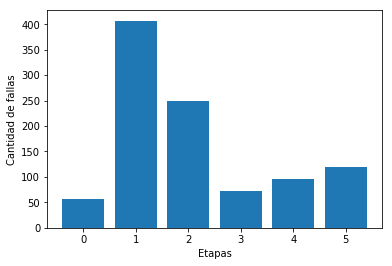

In [12]:
from random import randint, uniform,random
import matplotlib.pyplot as plt
i=0
c0=0
c1=0
c2=0
c3=0
c4=0
c5=0
#Se proceden a realizar mil lanzamientos de bolitas, por cada bolita se lanza un número al azar y, dependiendo su valor, 
#Se le asigna la etapa en la cual falló o acertó.
while(i<1000):
    x=randint(0,99)
    if(0<=x<6):
        c0+=1
    if(6<=x<46):
        c1+=1
    if(46<=x<70):
        c2+=1
    if(70<=x<77):
        c3+=1
    if(77<=x<87):
        c4+=1
    if(87<=x<100):
        c5+=1
    i+=1
#Con los datos obtenidos, se procede a realizar un histograma
lista=[c0,c1,c2,c3,c4,c5]
lista2=[0,1,2,3,4,5]
plt.bar(lista2,lista,align='center') 
plt.xlabel('Etapas')
plt.ylabel('Cantidad de fallas')
print("No fallaron: ",c0)
print("Fallaron en la etapa 1: ",c1)
print("Fallaron en la etapa 2: ",c2)
print("Fallaron en la etapa 3: ",c3)
print("Fallaron en la etapa 4: ",c4)
print("Fallaron en la etapa 5: ",c5)


    

Los resultados obtenidos son similares a los obtenidos en el inciso b), la función probabilidad y el método estandar presentan la misma tendencia en sus resultados, por lo que se reconoce que ambos acercamientos al problema presenta resultados correctos. Por otro lado, mirando el histograma podemos notar que la mayor de cantidad de fallos lo presenta la etapa uno y la etapa dos, el resto se reparte en la etapa tres, cuatro y cinco. La etapa cero presenta la cantidad de éxitos, el cual presenta la menor cantidad respecto al resto de etapas.

## 3. Perritos Enfermos

Usted trabaja en un refugio de animales que se especializa en recibir perros, además de contar con el equipo necesario para tratar con enfermedades que estos puedan presentar. Viendo las noticias se enteró que un virus sumamente peligroso para los perros se está expandiendo rápidamente por la zona y sospecha que algunos de los perros bajo su cuidado pueden estar infectados pero, no presentan un síntoma de momento. Para suerte suya este virus tiene cura hace tiempo y cuenta con el equipo para analizar muestras de saliva para detectar qué perro está infectado con el virus o no.

Usted tiene 500 perros, para no hacer la prueba 1 a 1 ha decidido juntar muestras de saliva en grupos de $K$ perros (con $K$ siendo un divisor de 500), y en caso de que el examen arroje positivo hará la prueba 1 a 1 del grupo. Asuma que 8 perros están infectados, pero usted no sabe esto a priori.

>a) ¿Es posible determinar **teóricamente** un $K$ tal que la cantidad de veces que se realiza la prueba sea la menor posible? De ser así, encuentre dicho K. ¿Qué distribución es comparable a este fenómeno?

La distribución de probabilidad discreta que más se asemeja a éste fenómeno es la distribución hipergeométrica. La distribución hipergeométrica representa muestreos aleatorios sin reemplazo. A grandes rasgos, la distribución modela que si se tiene N elementos de los cuales a pertenecen a la categoria A, y N-a pertenece a la categoria A complemento, la probabilidad de obtener x (0=<x=<a) elementos de la categoría A e:

P(X=x)=$\frac{{d}\choose{x}}{{N}\choose{n}}$* ${N-a}\choose{n-x}$

Con:  

N:El tamaño de la población  


n:El tamaño de la muestra extraida  


d:El número de la población original que pertenece al grupo deseado  


x:Es el número de la muestra que pertenecen a dicha categoria  

Ahora, se procede a realizar un función que representa la cantida de revisiones realizadas en función de los perritos enfermos y la extracción de grupos. Para que ésta función tenga sentido se realiza el siguiente supuesto:
* La función tiene sentido para una cantidad de perritos enfermos debe ser  menor que el de la cantidad de grupos.  
* La distribución de los perritos enfermos es equiprobable dentro de cada uno de los grupos de K   
De esta forma, se define la función de "veces realizada la prueba" como:

F(K)= $\frac{500}{k} + K*E$

Con:  
K: El tamaño del grupo  
E: La cantidad de perritos enfermos

Para sacar el mínimo de K se deriva la función y se obtiene:
$K= \sqrt{\frac{500}{E}}$  
Ahora, si se desea estandarizar este valor para todos los valores de E, se deduce que, si la cantidad de E es mayor a la cantidad de grupos, se obtiene la siguiente ecuación:

F(K)= $\frac{500}{k} + K*\frac{500}{k}$
Derivando se obtiene:
K=1, lo cuál es lógico, ya que para ese caso no en cuantos grupos se divida, se terminarán revisando los 500 perritos eventualmente.









>b) Encuentre **empíricamente** un valor de $K$ que minimice la cantidad de veces que se realiza la prueba y compare con el obtenido en b)

In [9]:
from random import randrange as rand
k2 = 0
k4 = 0
k5 = 0
k10 = 0
k20 = 0
k25 = 0
k50 = 0 
k100 = 0                                  # Inicializacion de contadores.
k125 = 0
k250 = 0 
suma2 = 0
suma4 = 0
suma5 = 0
suma10 = 0
suma20 = 0
suma25 = 0
suma50 = 0
suma100 = 0
suma125 = 0
suma250 = 0
for x in range(3000):                               # Se repite 3000 veces el experimento.
    enf = 8
    divisores = [2,4,5,10,20,25,50,100,125,250]
    posiciones = []                                 # Lista para guardar la posicion de los perritos enfermos.
    perritos = []                                   # Lista para guardar a los perritos.
    minimo = 500

    for i in range(enf):
        pos = rand(500)
        while(pos in posiciones):                   # Se determina la posicion que ocupara cada perro enfermo
            pos = rand(500)                         # en la lista de perritos y se ordena de manera ascendente.
        posiciones.append(pos)
    posiciones.sort()
    
    cont = 0
    for k in range(500):                            # Se construye la lista de perritos poniendo un 0 si el
        if(cont != len(posiciones)):                # perrito esta sano o 1 si el perrito esta enfermo.
            if(k == posiciones[cont]):               
                perritos.append(1)                  # Para eso se tiene un contador que avanza por la lista 
                cont += 1                           # de posiciones y cada vez que en la lista de perritos 
            else:                                   # la posicion sea igual a la posicion marcada, se coloca 
                perritos.append(0)                  # el 1 en la lista perritos y el contador avanza a la  
        else:                                       # siguiente posicion. 
            perritos.append(0)                       
                                                     
    for k in divisores:                             # Se comienza a revisar la lista de perritos 
        cont = 0                                    # con cada valor de k correspondiente (se omite el 1 y el 500
        prueba = 0                                  # ya que nunca van a minimizar la cantidad de pruebas).
        for l in range(500//k):
            if(cont != 500):                        # Se hace la prueba grupo por grupo, y en caso de que haya al 
                if(1 in perritos[cont:cont+k]):     # menos un perrito enfermo se suman la cantidad de pruebas 
                    prueba += k                     # correspondiente al tamaño del grupo.
                prueba += 1                         
            cont += k    
        if(prueba < minimo):                        # Se revisa si el k utilizado es el minimo actualmente
            minimo = prueba                         # y en caso de que lo sea, se guarda.
            kmin = k
    if(kmin == 2):
        k2 += 1
        suma2 += minimo
    elif(kmin == 4):
        k4 += 1
        suma4 += minimo
    elif(kmin == 5):
        k5 += 1
        suma5 += minimo
    elif(kmin == 10):                               # Se verifica cual k fue el que minimizo la cantidad de 
        k10 += 1                                    # pruebas en esa repeticion, se aumenta el contador y  
        suma10 += minimo                            # se suma la cantidad de pruebas que realizo ese k
    elif(kmin == 20):                               # para luego mostrar por pantalla su promedio.
        k20 += 1
        suma20 += minimo
    elif(kmin == 25):
        k25 += 1
        suma25 += minimo
    elif(kmin == 50):
        k50 += 1
        suma50 += minimo
    elif(kmin == 100):
        k100 += 1
        suma100 += minimo
    elif(kmin == 125):
        k125 += 1
        suma125 += minimo
    elif(kmin == 250):
        k250 += 1
        suma250 += minimo

print("La cantidad de veces que k = 2 minimizó la cantidad de pruebas es:",k2)
if(k2 != 0):
    print("Pruebas promedio:",suma2//k2)
    
print("\nLa cantidad de veces que k = 4 minimizó la cantidad de pruebas es:",k4)
if(k4 != 0):
    print("Pruebas promedio:",suma4//k4)
    
print("\nLa cantidad de veces que k = 5 minimizó la cantidad de pruebas es:",k5)
if(k5 != 0):
    print("Pruebas promedio:",suma5//k5)
    
print("\nLa cantidad de veces que k = 10 minimizó la cantidad de pruebas es:",k10)
if(k10 != 0):
    print("Pruebas promedio:",suma10//k10)
    
print("\nLa cantidad de veces que k = 20 minimizó la cantidad de pruebas es:",k20)
if(k20 != 0):
    print("Pruebas promedio:",suma20//k20)
    
print("\nLa cantidad de veces que k = 25 minimizó la cantidad de pruebas es:",k25)    
if(k25 != 0):
    print("Pruebas promedio:",suma25//k25)
    
print("\nLa cantidad de veces que k = 50 minimizó la cantidad de pruebas es:",k50)    
if(k50 != 0):
    print("Pruebas promedio:",suma50//k50)
    
print("\nLa cantidad de veces que k = 100 minimizó la cantidad de pruebas es:",k100)    
if(k100 != 0):
    print("Pruebas promedio:",suma100//k100)

print("\nLa cantidad de veces que k = 125 minimizó la cantidad de pruebas es:",k125)
if(k125 != 0):
    print("Pruebas promedio:",suma125//k125)
    
print("\nLa cantidad de veces que k = 250 minimizó la cantidad de pruebas es:",k250)
if(k250 != 0):
    print("Pruebas promedio:",suma250//k250)
    
print("\nTotal =",k2+k4+k5+k10+k20+k25+k50+k100+k125+k250)

La cantidad de veces que k = 2 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 4 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 5 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 10 minimizó la cantidad de pruebas es: 2988
Pruebas promedio: 124

La cantidad de veces que k = 20 minimizó la cantidad de pruebas es: 12
Pruebas promedio: 118

La cantidad de veces que k = 25 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 50 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 100 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 125 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 250 minimizó la cantidad de pruebas es: 0

Total = 3000


Como se puede observar, de las 3000 repeticiones se obtiene que distintos valores de k (10,20,25) logran minimizar la cantidad de pruebas a realizar en cada caso, sin embargo k = 10 muestra una frecuencia mucho mayor que los demás valores de k. Respecto al resultado obtenido en el inciso a) (7.9 aproximadamente) el valor obtenido empíricamente se acerca bastante al valor teórico, ya que hay que tener en cuenta que el valor de k no puede ser cualquier entero (dominio restringido). Sin embargo, el valor teórico es una aproximación que posee bastantes supuestos, por lo que su valor también puede no ser tan preciso.

>c) Ahora usted conoce la cantidad de perros infectados, realice el mismo experimento que en b) y compare sus resultados. ¿A qué se debe esta diferencia? 

In [10]:
from random import randrange as rand
k2 = 0
k4 = 0
k5 = 0
k10 = 0
k20 = 0
k25 = 0
k50 = 0
k100 = 0
k125 = 0
k250 = 0
suma2 = 0
suma4 = 0
suma5 = 0
suma10 = 0
suma20 = 0
suma25 = 0
suma50 = 0
suma100 = 0
suma125 = 0
suma250 = 0
for x in range(3000):
    enf = 8
    divisores = [2,4,5,10,20,25,50,100,125,250]
    posiciones = []
    perritos = []
    minimo = 500

    for i in range(enf):
        pos = rand(500)
        while(pos in posiciones):
            pos = rand(500)
        posiciones.append(pos)
    posiciones.sort()
    
    cont = 0
    for k in range(500):
        if(cont != len(posiciones)):
            if(k == posiciones[cont]):
                perritos.append(1)
                cont += 1
            else:
                perritos.append(0)
        else:
            perritos.append(0)
            
    for k in divisores:
        cont = 0
        prueba = 0
        cont_enf = 0
        for l in range(500//k):
            if(cont != 500):
                if(1 in perritos[cont:cont+k]):
                    prueba += k
                    for m in range(cont,cont+k):
                        if(perritos[m] == 1):       # Es el mismo codigo que en el inciso b), solo que
                            cont_enf += 1           # en este caso se verifica que la cantidad de perritos
                        if(cont_enf == 8):          # enfermos encontrados sea igual a 8.
                            break                   # En caso de que se hayan encontrado los 8 perritos enfermos
                    if(cont_enf == 8):              # se sale de los for, se revisa si el k es minimo y se 
                        break                       # continua con el siguiente k.
                prueba += 1
            cont += k    
        if(prueba < minimo):
            minimo = prueba
            kmin = k
    
    if(kmin == 2):
        k2 += 1
        suma2 += minimo
    elif(kmin == 4):
        k4 += 1
        suma4 += minimo
    elif(kmin == 5):
        k5 += 1
        suma5 += minimo
    elif(kmin == 10):
        k10 += 1
        suma10 += minimo
    elif(kmin == 20):
        k20 += 1
        suma20 += minimo
    elif(kmin == 25):
        k25 += 1
        suma25 += minimo
    elif(kmin == 50):
        k50 += 1
        suma50 += minimo
    elif(kmin == 100):
        k100 += 1
        suma100 += minimo
    elif(kmin == 125):
        k125 += 1
        suma125 += minimo
    elif(kmin == 250):
        k250 += 1
        suma250 += minimo

#En caso de que un k no haya minimizado en ningun caso, no se muestra por pantalla su promedio.        
print("La cantidad de veces que k = 2 minimizó la cantidad de pruebas es:",k2)
if(k2 != 0):
    print("Pruebas promedio:",suma2//k2)
    
print("\nLa cantidad de veces que k = 4 minimizó la cantidad de pruebas es:",k4)
if(k4 != 0):
    print("Pruebas promedio:",suma4//k4)
    
print("\nLa cantidad de veces que k = 5 minimizó la cantidad de pruebas es:",k5)
if(k5 != 0):
    print("Pruebas promedio:",suma5//k5)
    
print("\nLa cantidad de veces que k = 10 minimizó la cantidad de pruebas es:",k10)
if(k10 != 0):
    print("Pruebas promedio:",suma10//k10)
    
print("\nLa cantidad de veces que k = 20 minimizó la cantidad de pruebas es:",k20)
if(k20 != 0):
    print("Pruebas promedio:",suma20//k20)
    
print("\nLa cantidad de veces que k = 25 minimizó la cantidad de pruebas es:",k25)    
if(k25 != 0):
    print("Pruebas promedio:",suma25//k25)
    
print("\nLa cantidad de veces que k = 50 minimizó la cantidad de pruebas es:",k50)    
if(k50 != 0):
    print("Pruebas promedio:",suma50//k50)
    
print("\nLa cantidad de veces que k = 100 minimizó la cantidad de pruebas es:",k100)    
if(k100 != 0):
    print("Pruebas promedio:",suma100//k100)

print("\nLa cantidad de veces que k = 125 minimizó la cantidad de pruebas es:",k125)
if(k125 != 0):
    print("Pruebas promedio:",suma125//k125)
    
print("\nLa cantidad de veces que k = 250 minimizó la cantidad de pruebas es:",k250)
if(k250 != 0):
    print("Pruebas promedio:",suma250//k250)
    
print("\nTotal =",k2+k4+k5+k10+k20+k25+k50+k100+k125+k250)

La cantidad de veces que k = 2 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 4 minimizó la cantidad de pruebas es: 2
Pruebas promedio: 80

La cantidad de veces que k = 5 minimizó la cantidad de pruebas es: 303
Pruebas promedio: 109

La cantidad de veces que k = 10 minimizó la cantidad de pruebas es: 2686
Pruebas promedio: 119

La cantidad de veces que k = 20 minimizó la cantidad de pruebas es: 9
Pruebas promedio: 113

La cantidad de veces que k = 25 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 50 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 100 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 125 minimizó la cantidad de pruebas es: 0

La cantidad de veces que k = 250 minimizó la cantidad de pruebas es: 0

Total = 3000


Al igual que en el inciso b), se obtienen diversos valores de k, pero en este caso la variación es aún más (4,5,10,20,25,50). Esto se debe a que al conocer la cantidad de perros que se encuentran enfermos, basta con revisar hasta que encontramos los 8 perros enfermos y detenernos. Por lo tanto por temas de azar podría ser que en un caso los perros enfermos estén muy juntos o más cerca del inicio, y le otorgue la posibilidad a otros valores de k minimizar la cantidad de pruebas a realizar. 
Sin embargo, igualmente el k = 10 predomina entre los otros valores.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día 27 de Abril a las 15hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)